# Pistachio Image Dataset Analysis using Machine Learning and Deep Learning




## 0 - Introduction



*  PRIMARY AIM

The primary aim of this study is to explore transfer learning and compare its performance with the use of hand-crafted features for a given problem. 


*   ADDITIONAL OBJECTIVES

There are additional objectives, including:
1. to practice all that we have explored so far in the previous lectures and lab sessions, e.g. data exploration and preparation; use of training, validation, and test sets; hyperparameter optimization; feature extraction and preprocessing; evaluation.
2. to explore use of published research studies as background for our experiments.


*   THE DATASET

We will use the *Pistachio Image Dataset* which includes both raw images (let's call it *Image Version* for convenience) as well as features computed from these (*Features Version* for convenience). 

**NB**: the instances for the *Features Version* do not have a unique identifier that will allow us to relate instances in the *Features Version* with instances in the *Image Version*. For the sake of this lab session, we can assume that the row number of an instance in the *Features Version* with respect to a given label corresponds to the id that can be matched with the instance ids in the file names for the *Image Version*.


*   PUBLISHED RESEARCH STUDY BACKGROUND

The publication that we will be considering today will is:
  > Singh, D., Taspinar, Y.S., Kursun, R., Cinar, I., Koklu, M., Ozkan, I.A. and Lee, H.N., 2022. Classification and analysis of pistachio species with pre-trained deep learning models. Electronics, 11(7), p.981. https://www.mdpi.com/2079-9292/11/7/981



## 1 - Loading the data






*   DOWNLOAD THE DATASET

You need to download the data before you can get started. Download from https://www.muratkoklu.com/datasets/. The link for the *Pistachio_Image_Dataset* is in the first table on the page.



*   UPLOAD TO COLAB

You would then have downloaded a *Pistachio_Image_Dataset.zip* file. This file can be uploaded to your Colab directory using the File menu in Google Colab. Once upload is complete, you should be able to see the file on the listed contents of your Colab directory.


* THE DATASET FOLDER

You can now load the data from the zipped *Pistachio_Image_Dataset* folder. The folder has three sets of data (and so, three subfolders):

  1. *Pistachio_Image_Dataset* - i.e., the *Image Version*, containing image data as jpg files split between two folders named with the classification label of interest
  2.   *Pistachio_16_Features_Dataset* - i.e., one part of the *Features Version*, with 16 handcrafted features extracted from the image data, represented as a feature vector and labels provided in different file formats including xls
  3.  *Pistachio_28_Features_Dataset* - i.e., the other part of the *Features Version*, with 28 handcrafted features extracted from the image data, represented as a feature vector and labels provided in different file formats including xls

We will use just 1 and 2, i.e. *Pistachio_Image_Dataset* and *Pistachio_28_Features_Dataset* today.

#### UNZIPPING THE FOLDER

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

# specifying the full path for the uploaded zipped dataset file
#data_folder_full_path = "/content/Pistachio_Image_Dataset.zip"
data_folder_full_path = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset.zip"
  
# loading the zip file and creating a zip object
with ZipFile(data_folder_full_path, 'r') as datasetFolderObject:
  
    # and then extracting the contents to the main directory
    datasetFolderObject.extractall(path="/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6")

# lists the content of your main Colab directory
!ls  /content

drive  sample_data


#### LOADING THE *28_FEATURES VERSION* DATA FROM FILE

In [ ]:
import numpy
import pandas

# specifying the full path for the unzipped xls file for the 28_features version
# of the dataset
#feat_data_file_full_path = "/content/Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls"
feat_data_file_full_path = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls"

# loading the data from the xls file
feat_28_data_pandas = pandas.read_excel(feat_data_file_full_path) 
feat_28_data = feat_28_data_pandas.to_numpy()

# outputing the shape of the loaded data to the screen
print("\n The dataset has shape: "+str(feat_28_data.shape))


# get the features and the labels from the loaded data
# remember that the label column is the last column of the file
feat_col = numpy.arange(0, feat_28_data.shape[1]-1)
label_col = feat_28_data.shape[1]-1

feats_28 = feat_28_data[:, feat_col]
labels = feat_28_data[:, label_col]

print("\n A peek at the 28-features dataset features: \n"+str(feats_28))
print("\n A peek at the 28-features dataset labels: \n"+str(labels))



 The dataset has shape: (2148, 29)

 A peek at the 28-features dataset features: 
[[63391 1568.405 390.3396 ... 2.9692 3.0576 2.9542]
 [68358 1942.187 410.8594 ... 1.9807 2.1006 2.2152]
 [73589 1246.538 452.363 ... 3.542 3.6856 4.1012]
 ...
 [101136 1255.619 475.2161 ... 3.3112 3.4306 3.0697]
 [97409 1195.215 452.1823 ... 3.4237 2.9606 3.0033]
 [78466 2356.908 445.9131 ... 2.5278 2.2248 2.448]]

 A peek at the 28-features dataset labels: 
['Kirmizi_Pistachio' 'Kirmizi_Pistachio' 'Kirmizi_Pistachio' ...
 'Siirt_Pistachio' 'Siirt_Pistachio' 'Siirt_Pistachio']


#### PRE-LOADING THE *IMAGE VERSION* DATA

Here, we only load the path addresses of the images, i.e. 'pre-load'. Loading all the images into memory at once would not be efficient memory-wise.

In [ ]:
import os

# specifying the full path for the folders containing
# the image version of the dataset
image_source_dir_kirmizi = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio"
image_source_dir_siirt = "/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio"


# creating a method for getting the path addresses for the (image) contents
# of the image source folders
# as we also want to relate the image instances to the data instances (rows)
# in the 28_Features Version of the dataset, we also need to get
# the instance id in the file names of the images.
# Remember that some filenames have the instance id repeated in bracket
# for another instance, so we need to address that.
def get_filepaths(image_source_dir, num_id_bracketed, limit=0):
  image_files = []
  instance_ids = []
  count_instances = limit

  # Looping through all the files in the given folder
  # to get the full filepath for the file
  # and the instance id from the filename.
  # 
  # We need to account for the ids repeated in brackets, 
  # in order to get unique ids. For the sake of this lab,
  # we will assume that the instances with the bracketed ids 
  # are earlier instances than instances without brackets
  # i.e. (1), (2) are earlier than 1, for example
  for filename in os.listdir(image_source_dir):
    image_files.append(os.path.join(image_source_dir, filename))

    instance = filename.split(' ')
    #print(instance)
    instance = instance[1].split('.')
    #print(instance)
    instance = instance[0]
    #print(instance)
    if instance[0]=='(':
      instance = instance[1:]
      instance = instance[:len(instance)-1]
      instance = int(instance)
    else:
      instance = int(instance)+num_id_bracketed
    #print(instance)
    instance_ids.append(instance-1+limit)

    count_instances += 1

  return image_files, instance_ids, count_instances


# getting the path address for each image in the folders
#
# Since the Kirmizi instances appear as the first rows in the 28_Features Version,
# we start the instance id ordering from the folder for this label.
# Remember that we want to be able to match instances in the 28_Features Version
# with instances in the Image Version.
image_files_kirmizi, instance_ids_kirmizi, count_instances_kirmizi = get_filepaths(image_source_dir_kirmizi, num_id_bracketed=65)
# Since the Siirt instances appear as the last rows in the 28_Features Version,
# we continue the instance id ordering based on the count of instances in the Kirmizi folder
image_files_siirt, instance_ids_siirt, _ = get_filepaths(image_source_dir_siirt, num_id_bracketed=50, limit=count_instances_kirmizi)

# combining the lists of files for both image source folders
image_files = []
image_files.extend(image_files_kirmizi)
image_files.extend(image_files_siirt)


# combining the list of instance ids for both image source folders
image_instance_ids = []
image_instance_ids.extend(instance_ids_kirmizi)
image_instance_ids.extend(instance_ids_siirt)

print("\n A peek at the image files: \n"+str(image_files))
print("\n A peek at the instance ids: \n"+str(image_instance_ids))


# double-checking that we now have unique instance ids.
# If we do, the number of unique instance ids should match
# the number of instances in the 28_Features Version data
print('\n Check:')
print(len(image_instance_ids))
print(numpy.unique(numpy.array(image_instance_ids)).shape)
print(labels.shape)


 A peek at the image files: 
['/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1149.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 115.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1150.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1151.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1152.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1153.jpg', '/content/drive/MyDrive/Colab Notebooks/sussex_ML/week6/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/ki

## 2 - Preprocessing I - Recoding the labels



You will have noticed that the labels provided in the 28_Features Version data are still in their nominal form. These need to be changed to numerical form.
>

We can simply recode 'Kirmizi_Pistachio' labels as '0' and 'Siirt_Pistachio' labels as '1'. (We could also have it the other way around, or use different numerical codes such as '34' and '112' or any other integer numbers. '0' and '1' is just more intuitive.)

In [ ]:
# recoding the nominal labels as numeric
numpy.place(labels, labels=='Kirmizi_Pistachio', '0')
numpy.place(labels, labels=='Siirt_Pistachio', '1')
print("\n The recoded labels: ", str(numpy.unique(labels)))

# converting from string type to integer type
labels = labels.astype(int)
print("\n A peek at the recoded 28-features dataset labels: \n"+str(labels))


 The recoded labels:  ['0' '1']

 A peek at the recoded 28-features dataset labels: 
[0 0 0 ... 1 1 1]


## 3 - Exploring the data




After you load the data, you should explore it. Remember the importance of exploring and understanding the data? (See the Week 2 lab notebook for link to a short video on 'Data-centric AI'). You could, for example, look at relationships between each individual feature and the labels, e.g. using scatter plots or boxplots with the *matplotlib* library (https://matplotlib.org/stable/api/index.html) or Excel or other external software. 




#### EXPLORING THE DATASET

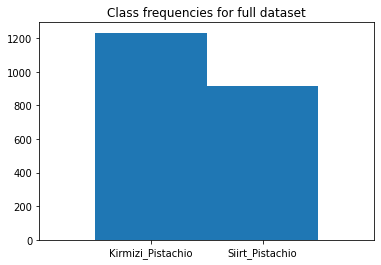

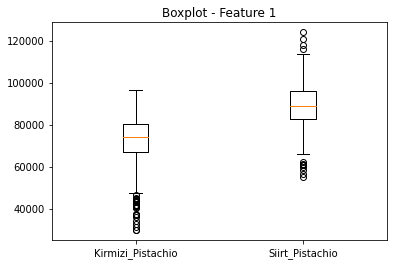

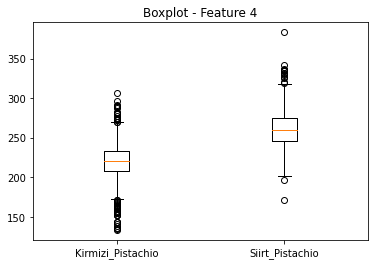

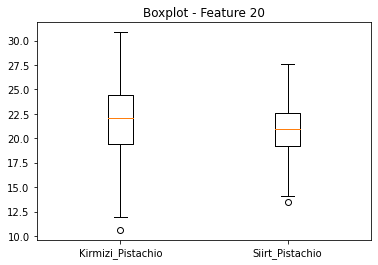

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# setting a seed to be used for any function that explicitly makes use of
# a random number generator. (We looked at the importance of setting this 
# in the Week 1 lab notebook)
random_seed = 1


label_types = ['Kirmizi_Pistachio', 'Siirt_Pistachio']


# creating a function for histogram plots for the labels in the dataset
def label_distr_plot(plot_data, plot_label):
  plt.figure()
  _, _, _ = plt.hist(plot_data, bins=[0, 1, 2], align='left')
  plt.title(plot_label)
  plt.xticks(numpy.unique(plot_data), label_types)
  plt.xlim(left=min(numpy.unique(plot_data))-1, right=max(numpy.unique(plot_data))+1)
  plt.show()
  print('\n')

# creating a function for boxplots of the given feature data by label class
def feats_box_plot(full_data, full_grouping, plot_label):
  plt.figure()
  groups = numpy.unique(full_grouping)
  plot_data = []
  for i in groups:
    plot_data.append(full_data[full_grouping==i])
  plt.boxplot(plot_data)
  plt.title(plot_label)
  plt.xticks(groups+1, label_types)
  plt.show()
  print('\n')
  

# plotting the frequencies of each class in the labels
label_distr_plot(labels, 'Class frequencies for full dataset')

# plotting the distribution of values for some of the features
# Remember that there are 28 of them
#
# Due to deprecated formats in the numpy library used by the matplotlib library
# internally, you will see 'Deprecation' warnings. You can ignore them.

feats_box_plot(feats_28[:, 0], labels, 'Boxplot - Feature 1')
feats_box_plot(feats_28[:, 3], labels, 'Boxplot - Feature 4')
feats_box_plot(feats_28[:, 19], labels, 'Boxplot - Feature 20')

## 4 - Splitting into training, validation, and test sets



You should split the data into training, validation, and test sets. Remember that we build the model using the training set, use the validation set to select the optimal values for the hyperparameters that we decide to optimize, then finally evaluate the model with these hyperparameter settings using the test set. What is the distribution of the labels in your training, validation, and sets**?**


#### SPLITTING THE DATASET

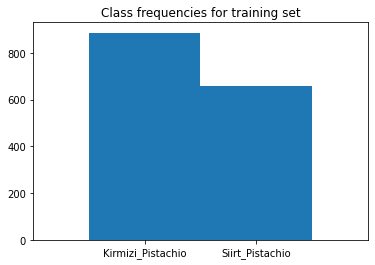

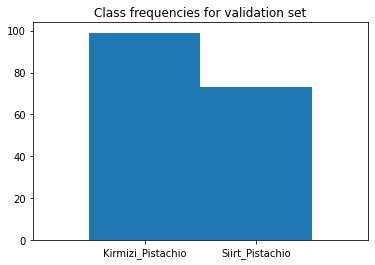

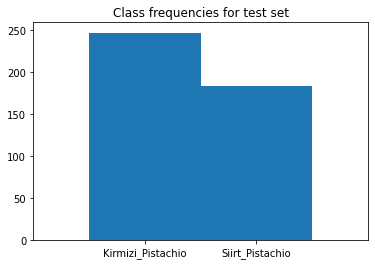

In [ ]:
from sklearn.model_selection import train_test_split

# first randomly splitting the data 80/20 into training and test sets
# This is the same split ratio used in the published paper
# mentioned in the Introduction (See the second paragraph 
# of the Experimental Results section of the paper)
#
# Notice that I included the 'stratify' parameter in the train_test_split
# function call here. This ensures that the two splits (training and test)
# have similar distributions of the class labels.
# You can convince yourself that this is true
# by looking at the label distribution plot output of this cell
all_ids = numpy.arange(0, feats_28.shape[0])
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.2, train_size=0.8, 
                                 random_state=random_seed, shuffle=True, stratify=labels)


# then further splitting the training set into training and validation sets
train_set_ids, val_set_ids = train_test_split(train_set_ids, test_size=0.1, train_size=0.9, 
                                 random_state=random_seed, shuffle=True, stratify=labels[train_set_ids])



# showing the distribution of the labels in the final training, validation, and test sets
label_distr_plot(labels[train_set_ids], 'Class frequencies for training set')
label_distr_plot(labels[val_set_ids], 'Class frequencies for validation set')
label_distr_plot(labels[test_set_ids], 'Class frequencies for test set')



## 5 - Preprocessing II - Normalizing the 28 hand-crafted features




See Weeks 4 and 5 lab notebooks on introduction to feature scaling (aka 'normalization').

In [ ]:
from sklearn.preprocessing import StandardScaler

# creating a function for normalizing the feature vector
# using a standard scaling (results in mean=0 and standard deviation=1)
def scale_feats(feat_vec):
  # Scaling the features to the same range of values
  scaler = StandardScaler()
  scaler.fit(feat_vec)
  scaled_feat_vec = scaler.transform(feat_vec)
  print("\n A peek at the scaled dataset features: \n"+str(scaled_feat_vec))

  return scaled_feat_vec

# normalize the feature vector
scaled_feats_28 = scale_feats(feats_28)




 A peek at the scaled dataset features: 
[[-1.26229557  0.3793384  -1.72358958 ... -0.11555997  0.23737327
   0.01817042]
 [-0.88367525  1.3748213  -1.09099947 ... -1.46261734 -1.23215144
  -0.96716768]
 [-0.48493096 -0.47788077  0.18848508 ...  0.66501106  1.20170087
   1.54751115]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ...  0.35049326  0.81013473
   0.17217116]
 [ 1.33080009 -0.61456785  0.18291441 ...  0.50380025  0.08842458
   0.0836374 ]
 [-0.11317108  2.47933587 -0.01035424 ... -0.71706844 -1.04143569
  -0.65676618]]


## 6 - Setting up for extraction of features based on the pretrained neural network



* WHAT PRETRAINED MODEL ARE WE USING?

We will use the pre-trained *VGG-16* model which is one of those used in the published study we want to replicate (See the Introduction). The *VGG-16* is a 16-layer CNN. Have a look at the basic details of the model here: https://pytorch.org/vision/stable/models/generated/torchvision.models.vgg16.html#torchvision.models.vgg16. 

> Reflective exploration prompts - Do you notice the number of parameters that it has**?** (Remember that we discussed the number of parameters in the Week 5 lecture). Can you tell how many different kinds of objects etc that it was trained to differentiate, i.e. the number of classes**?**  

You can read more about the VGG-16 model architecture here: https://arxiv.org/abs/1409.1556.

* WHAT DATA WAS IT TRAINED ON

The model was trained **in a supervised manner** (not self-supervised like the last example in the lecture) using the ImageNet dataset. The ImageNet dataset is a very large dataset (>14million instances as of this year) of labelled images of objects, scenes, humans, etc. You can read more about the dataset here: https://www.image-net.org/
 

> **Optional** - You can also try the other two pretrained models used in the paper we are trying to replicate (AlexNet and VGG-19). You can also explore others such as the ResNet-101 (See here for other pretrained models available in PyTorch: https://pytorch.org/vision/stable/models.html).



#### EXPLORING THE VGG16 MODEL

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the VGG16 model with pretrained weights based on the 1K_classes version of the ImageNet dataset
model_vgg16 = models.vgg16(weights="IMAGENET1K_V1")
print("\n Let's 'view' the model architecture:\n")
print(model_vgg16)






Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]


 Let's 'view' the model architecture:

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel

-- You can see from the output of the previous cell that the model has been structured into the:
1.   Feature (or representation) extraction layers - See CNN intro in Week 5 lecture for explanation of the use of deep neural networks for learning 'features' or 'representations'; and
2.   Classifier layers - An MLP that is focused on the classification task that was used to 'supervise' the mode training
 
-- Reflective exploration prompts:
*   Do you recognize any of the keywords in the model description in the output from the Week 5 class on CNNs**?** Which is unfamiliar to you**?**
*  **Optional** - You can attempt estimating the total number of parameters of the full VGG16 model based on the information given in the output**?** Remember that the number of parameters simply refers to the number of values in a weight vector, i.e. its size, and we looked at how to compute the number of parameters for a convolutional layer**?** (**Solution**: See the total number of parameters here: https://pytorch.org/vision/stable/models/generated/torchvision.models.vgg16.html#torchvision.models.vgg16)




#### CREATING A METHOD FOR EXTRACTING FEATURES USING THE MODEL

In [ ]:
from enum import auto
from torchvision.io import read_image


# Step 1: Initialize model with the best available weights
model_vgg16_featlayers = models.vgg16(weights="IMAGENET1K_FEATURES").features
model_vgg16_featlayers.eval()


# Step 2: Initialize the inference transforms
# This does some preprocessing behind the scenes, including:
# 1) Resized of the input to resize_size=[256];
# 2) Followed by a central crop of crop_size=[224];
# 3) And finally the values are first rescaled to [0.0, 1.0] 
# and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
# The transform function expects either:
# a batched (B, C, H, W) and single (C, H, W) image, as torch.Tensor objects. 
preprocess = models.VGG16_Weights.IMAGENET1K_FEATURES.transforms()


# I put the above outside the method so it's done once and for all
# rather than repeated for each image

# creating a function to get features learnt in the pretrained VGG16
# extracting these features for our own list of images
def get_img_feats(img_path):


  img = read_image(img_path)

  # Step 3: Apply inference preprocessing transforms
  batch = preprocess(img).unsqueeze(0)

  # Step 4: Use the model and print the predicted category
  auto_feats = model_vgg16_featlayers(batch).squeeze(0)
  auto_feats = auto_feats.detach().numpy()
  auto_feats = numpy.mean(auto_feats, axis=1, keepdims=False)
  auto_feats = numpy.mean(auto_feats, axis=1, keepdims=False)
  #print(auto_feats.shape)
  return auto_feats




Downloading: "https://download.pytorch.org/models/vgg16_features-amdegroot-88682ab5.pth" to /root/.cache/torch/hub/checkpoints/vgg16_features-amdegroot-88682ab5.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

## 7 - Modelling

### **Exercise A**

**Machine Learning algorithms** 

* k-nearest neighbours classifier
* Naive Bayes classifier
* Logistic regression
* Support vector machine
* Decision tree
* Random forest
* Neural networks 

### **Solution to Exercise A**


I will use a three-layer multilayer perceptron, i.e. a neural network that has 3 fully connected layers, with the following specifications:

*   Input size: the number of features
*   Hidden layer sizes: 100 units for each of the two hidden layers 
*   Output size: the number of label classes
*   Activation functions: ReLU activation for the two hidden layers and a sigmoid activation for the output layer


#### IMPORTS & METHODS

In [ ]:
# Code based on lab exercises from V. Sharmanska (USussex 2022)
# with some adaptation

import torch
from torch import nn
from torch.nn import functional as F
from typing import Callable
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from copy import deepcopy
import random

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# creating my network class
class three_layer_MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = torch.sigmoid):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.hidden_l1(inputs)
        x = self.hidden_l2(x)
        x = self.output_l3(x)
        x = self.activation_fn(x)
        return x

        

# creating my network class
class three_layer_MLP_withnorm(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_sizes: list,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = torch.sigmoid):
        super().__init__()
        self.batchnorm = nn.BatchNorm1d(input_size)
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.batchnorm(inputs)
        x = self.hidden_l1(x)
        x = self.hidden_l2(x)
        x = self.output_l3(x)
        x = self.activation_fn(x)
        return x

# creating a function for computing performance metrics of interest
def my_metrics(labels, predictions):
    
    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted

    predictions_numpy = predictions.detach().numpy()
    predicted_classes = numpy.argmax(predictions_numpy, axis=1)


    avg_f1_score = f1_score(labels, predicted_classes, average='macro')
    acc = accuracy_score(labels, predicted_classes)



    return avg_f1_score, acc

# creating a method for training a given model
def train_model(model, learning_rate, epochs, train_dataloader, val_dataloader):

  # The optimizer we'll use to update the model parameters
  # SGD = Stochastic Gradient Descent
  # (See https://pytorch.org/docs/stable/optim.html for othe types
  # implemented in the PyTorch library)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  # Compute the loss against the training labels using the nn.CrossEntropyLoss class 
  # The cross entropy loss for Pytorch softmax activation of the output with
  # and cross entropy so we could have done without having the softmax activation
  # in our output layer (this is not necessarily the case for libraries such as TensorFlow).
  loss_function = nn.CrossEntropyLoss()

  # Set the model to training mode
  model.train()

  best_model_acc = 0
  losses = []

  # Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
  # is called an epoch.
  for epoch in range(0, num_epochs):


      if epoch == 0:  best_model = deepcopy(model)


      for batch, (X_train, y_train) in enumerate(train_dataloader):


        # Then the value of loss function 
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
      
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)
    


        # We need to zero out the `.grad` buffers as otherwise on the backward pass we'll add the 
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Compute the model parameters' gradients 
        # and propagate the loss backwards through the network.
        train_loss.backward()

        # Now we update the model parameters using those gradients
        optimizer.step()

      for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

      if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

      # How well the network does on the batch is an indication of how well training is 
      # progressing
      print("epoch: {} - train loss: {:5.5f} train acc: {:2.2f} val loss: {:5.5f} val acc: {:2.2f}".format(
          epoch,
          train_loss.item(),
          train_acc,
          val_loss.item(),
          val_acc

      ))

      losses.append([train_loss.item(), val_loss.item()])


      
      
  model = best_model

  return model, losses




def evaluate_model(model, losses, test_dataloader):

  # Finally we can test our model on the test set and get an estimate of its performance. 
  # First set the model to evaluation mode 
  model.eval()  
  for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)    
    test_avg_f1_score, test_accuracy = my_metrics(y_test, test_pred)
    print("\n test f1 score: {:1.2f} | test accuracy: {:2.2f}".format(test_avg_f1_score, test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    test_f1_scores = f1_score(y_test, numpy.argmax(test_pred_numpy, axis=1), average=None)
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))


    print("\n Confusion matrix:")
    confusion_mat = confusion_matrix(y_test, numpy.argmax(test_pred_numpy, axis=1))
    disp = ConfusionMatrixDisplay(confusion_mat, display_labels=label_types)
    disp.plot()
    plt.show()

    print("\n Loss:")
    fig, ax = plt.subplots()
    losses = numpy.array(losses)
    ax.plot(losses[:, 0], 'k-', label='training loss') 
    ax.plot(losses[:, 1], 'b-', label='validation loss') 
    plt.legend(loc='upper right')


# A class for managing the data for training the model
class Feats28Dataset(Dataset):
    def __init__(self, feats, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)
        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
      
        return self.feats[idx, :], self.labels[idx]


# A class for managing the data for training the model
# for the images
class AutoFeatsDataset(Dataset):
    def __init__(self, img_files, labels):
        # Convert your features and labels from numpy arrays to PyTorch tensors
        self.image_files = img_files
        # I subtract 1 to change the range of the labels from 1 - 7 to 0 - 6
        # This will be necessary for the loss function computation
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        # now extracting the features using the the pretrained model
        auto_feats = get_img_feats(self.image_files[idx])
        
        #print("Checking the number of features: ", auto_feats.shape)

        feats_tensor = torch.tensor(auto_feats, dtype=torch.float32)

        return feats_tensor, self.labels[idx]


#### RUNNING EXPERIMENT 1a


 Batch size= 60

 Learning rate= 1e-05

 Number of epochs= 50

 Model=3-layer MLP

 Feats=28 handcrafted features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.68928 train acc: 0.59 val loss: 0.68252 val acc: 0.65
epoch: 1 - train loss: 0.68926 train acc: 0.59 val loss: 0.68250 val acc: 0.65
epoch: 2 - train loss: 0.68924 train acc: 0.59 val loss: 0.68247 val acc: 0.65
epoch: 3 - train loss: 0.68923 train acc: 0.59 val loss: 0.68245 val acc: 0.65
epoch: 4 - train loss: 0.68921 train acc: 0.59 val loss: 0.68243 val acc: 0.65
epoch: 5 - train loss: 0.68919 train acc: 0.59 val loss: 0.68240 val acc: 0.65
epoch: 6 - train loss: 0.68917 train acc: 0.59 val loss: 0.68238 val acc: 0.65
epoch: 7 - train loss: 0.68915 train acc: 0.59 val loss: 0.68236 val acc: 0.65
epoch: 8 - train loss: 0.68913 train acc: 0.59 val loss: 0.68233 val acc: 0.65
epoch: 9 - train loss: 0.68911 train acc: 0.59 val loss: 0.68231 val acc: 0.65
epoch: 10 - train loss: 0.68909 train acc: 0

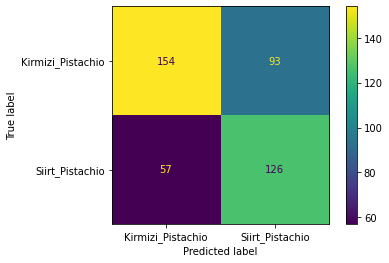


 Loss:


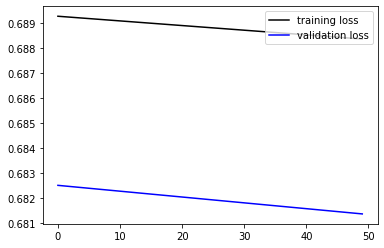

In [ ]:

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = scaled_feats_28.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 50
learning_rate = 0.00001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=28 handcrafted features')

# Set up the data loading by batch
# With the test and validation sets having only one batch

train_set = Feats28Dataset(scaled_feats_28[train_set_ids, :], 
                             labels[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = Feats28Dataset(scaled_feats_28[val_set_ids, :], 
                             labels[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set))
test_set = Feats28Dataset(scaled_feats_28[test_set_ids, :], 
                             labels[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
three_layer_MLP_model, losses = train_model(three_layer_MLP_model, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model, losses, test_dataloader)




#### RUNNING EXPERIMENT 1b


 Batch size= 60

 Learning rate= 0.001

 Number of epochs= 50

 Model=3-layer MLP

 Feats=28 handcrafted features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.68751 train acc: 0.61 val loss: 0.68022 val acc: 0.66
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.68568 train acc: 0.63 val loss: 0.67791 val acc: 0.70
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.68385 train acc: 0.63 val loss: 0.67563 val acc: 0.72
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.68205 train acc: 0.65 val loss: 0.67336 val acc: 0.74
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.68026 train acc: 0.65 val loss: 0.67112 val acc: 0.76
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.67848 train acc: 0.65 val loss: 0.66889 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.67673 train acc: 0.67 val los

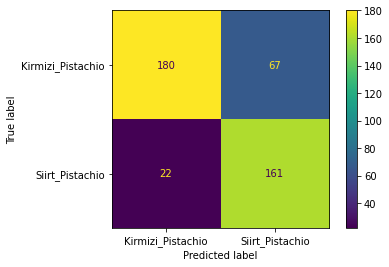


 Loss:


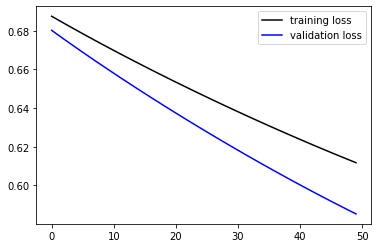

In [ ]:

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = scaled_feats_28.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vB = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 50
learning_rate = 0.001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=28 handcrafted features')




# Train the model
three_layer_MLP_model_vB, losses = train_model(three_layer_MLP_model_vB, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vB, losses, test_dataloader)




#### RUNNING EXPERIMENT 1c


 Batch size= 60

 Learning rate= 0.001

 Number of epochs= 100

 Model=3-layer MLP

 Feats=28 handcrafted features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.68751 train acc: 0.61 val loss: 0.68022 val acc: 0.66
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.68568 train acc: 0.63 val loss: 0.67791 val acc: 0.70
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.68385 train acc: 0.63 val loss: 0.67563 val acc: 0.72
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.68205 train acc: 0.65 val loss: 0.67336 val acc: 0.74
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.68026 train acc: 0.65 val loss: 0.67112 val acc: 0.76
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.67848 train acc: 0.65 val loss: 0.66889 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.67673 train acc: 0.67 val lo

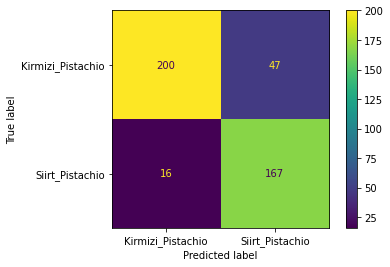


 Loss:


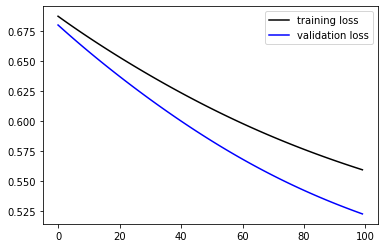

In [ ]:

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = scaled_feats_28.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vC = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 100
learning_rate = 0.001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=28 handcrafted features')



# Train the model
three_layer_MLP_model_vC, losses = train_model(three_layer_MLP_model_vC, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vC, losses, test_dataloader)




#### RUNNING EXPERIMENT 1d


 Batch size= 60

 Learning rate= 0.001

 Number of epochs= 200

 Model=3-layer MLP

 Feats=28 handcrafted features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.68751 train acc: 0.61 val loss: 0.68022 val acc: 0.66
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.68568 train acc: 0.63 val loss: 0.67791 val acc: 0.70
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.68385 train acc: 0.63 val loss: 0.67563 val acc: 0.72
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.68205 train acc: 0.65 val loss: 0.67336 val acc: 0.74
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.68026 train acc: 0.65 val loss: 0.67112 val acc: 0.76
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.67848 train acc: 0.65 val loss: 0.66889 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.67673 train acc: 0.67 val lo

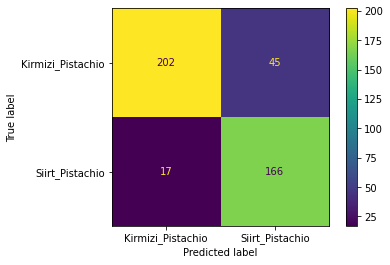


 Loss:


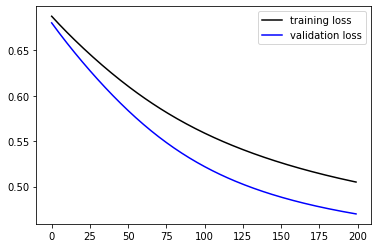

In [ ]:

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = scaled_feats_28.shape[1]
hidden_layer_sizes = [100, 100]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vD = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 200
learning_rate = 0.001
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=28 handcrafted features')



# Train the model
three_layer_MLP_model_vD, losses = train_model(three_layer_MLP_model_vD, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vD, losses, test_dataloader)




#### RUNNING EXPERIMENT 2


 Batch size= 60

 Learning rate= 0.009

 Number of epochs= 7

 Model=3-layer MLP

 Feats=VGG16 features
Found improvement in performance. New model saved.
epoch: 0 - train loss: 0.67943 train acc: 0.67 val loss: 0.67634 val acc: 0.63
Found improvement in performance. New model saved.
epoch: 1 - train loss: 0.66383 train acc: 0.74 val loss: 0.65950 val acc: 0.70
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.64783 train acc: 0.80 val loss: 0.64210 val acc: 0.79
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.63089 train acc: 0.76 val loss: 0.62358 val acc: 0.85
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.61281 train acc: 0.80 val loss: 0.60373 val acc: 0.88
Found improvement in performance. New model saved.
epoch: 5 - train loss: 0.59375 train acc: 0.83 val loss: 0.58278 val acc: 0.91
Found improvement in performance. New model saved.
epoch: 6 - train loss: 0.57420 train acc: 0.87 val loss: 0.56131

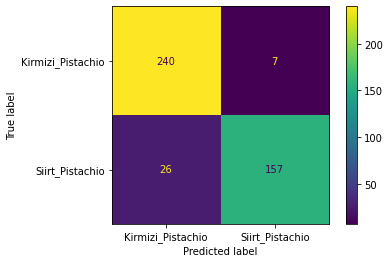


 Loss:


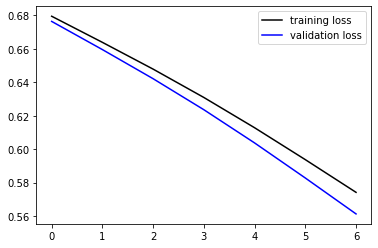

In [ ]:
# CAN TAKE AT LEAST TWO HOURS

# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)
numpy.random.seed(random_seed)

# Create an instance of your network
feature_count = 512
hidden_layer_sizes = [50, 10]
class_count = numpy.unique(labels).shape[0]
three_layer_MLP_model_vautofeats = three_layer_MLP_withnorm(feature_count, hidden_layer_sizes, class_count)


# Set parameter values
num_epochs = 7
learning_rate = 0.009
batch_size = 60

print('\n Batch size=', str(batch_size))
print('\n Learning rate=', str(learning_rate))
print('\n Number of epochs=', str(num_epochs))
print('\n Model=3-layer MLP')
print('\n Feats=VGG16 features')

# Set up the data loading by batch
# With the test and validation sets having only one batch
image_files_reordered = numpy.array([image_files[i] for i in image_instance_ids])


train_set = AutoFeatsDataset(image_files_reordered[train_set_ids], 
                             labels[train_set_ids])
train_dataloader = DataLoader(train_set, batch_size=batch_size, num_workers=2)


val_set = AutoFeatsDataset(image_files_reordered[val_set_ids], 
                             labels[val_set_ids])
val_dataloader = DataLoader(val_set, batch_size=len(val_set), num_workers=2)


test_set = AutoFeatsDataset(image_files_reordered[test_set_ids], 
                             labels[test_set_ids])
test_dataloader = DataLoader(test_set, batch_size=len(test_set))


# Train the model
three_layer_MLP_model_vautofeats, losses = train_model(three_layer_MLP_model_vautofeats, learning_rate, num_epochs, train_dataloader, val_dataloader)

# Evaluate the trained model
evaluate_model(three_layer_MLP_model_vautofeats, losses, test_dataloader)




## Other Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


 for c=0.1...

 for c=1.0...

 for c=10.0...

 The optimal c for this data is: 10.0

 The F1 scores for each of the classes are: [0.91925466 0.89655172]

 The average F1 score is: 0.9079031912615122

 The overall accuracy is: 0.9093023255813953


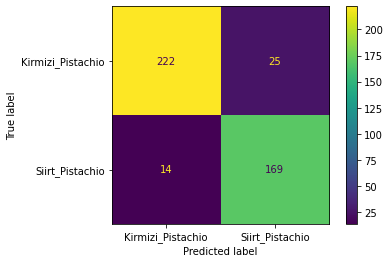

In [ ]:
# # build the model
# Use the validation set to optimize the hyperparameters you wish to
c_options = [0.1, 1.0, 10.0]
best_c = 0.1
best_c_perf = 0
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids];

for c in c_options:
  print("\n for c="+str(c)+"...")
  model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=c, fit_intercept=True, max_iter = 200, intercept_scaling=1, solver='lbfgs', verbose=0, class_weight=None, random_state=random_seed)
  model.fit(scaled_feats_28[train_set_ids, :], train_labels)
  val_pred = model.predict(scaled_feats_28[val_set_ids, :])

  avg_f1_score = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score > best_c_perf:
    best_c = c
    best_c_perf = avg_f1_score

print('\n The optimal c for this data is: '+str(best_c))

# Use the optimized hyperparameter to train the final model
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=best_c, fit_intercept=True, max_iter = 200, intercept_scaling=1, solver='lbfgs', verbose=0, class_weight=None, random_state=random_seed)
model.fit(scaled_feats_28[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = labels[test_set_ids]
test_pred = model.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()



 for c=2...

 for c=3...

 for c=4...

 for c=5...

 for c=6...

 The optimal n_neighbors for this data is: 5

 The F1 scores for each of the classes are: [0.9127789  0.88283379]

 The average F1 score is: 0.8978063460656271

 The overall accuracy is: 0.9


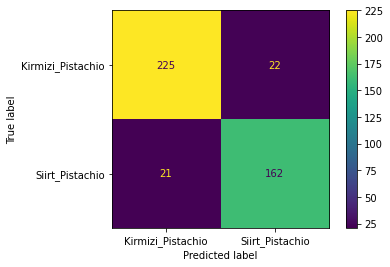

In [ ]:
# KNN classifier
# Use the validation set to optimize the hyperparameters you wish to
neighbors_options = [2, 3, 4, 5, 6]
best_n = 0.1
best_n_perf = 0
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids];

for n in neighbors_options:
  print("\n for c="+str(n)+"...")
  model = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
  model.fit(scaled_feats_28[train_set_ids, :], train_labels)
  val_pred = model.predict(scaled_feats_28[val_set_ids, :])

  avg_f1_score = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score > best_n_perf:
    best_n = n
    best_n_perf = avg_f1_score

print('\n The optimal n_neighbors for this data is: '+str(best_n))

# Use the optimized hyperparameter to train the final model
model = KNeighborsClassifier(n_neighbors=best_n, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model.fit(scaled_feats_28[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = labels[test_set_ids]
test_pred = model.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()


 The average F1 score using validation set is: 0.8925000000000001

 The F1 scores for each of the classes are: [0.9127789  0.88283379]

 The average F1 score is: 0.8978063460656271

 The overall accuracy is: 0.9


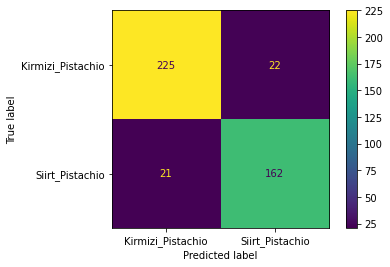

In [ ]:
# GaussianNB
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids]
test_labels = labels[test_set_ids]
gnb = GaussianNB()   
gnb.fit(scaled_feats_28[train_set_ids, :], train_labels)
val_pred = gnb.predict(scaled_feats_28[val_set_ids, :])

val_avg_f1_score = f1_score(val_labels, val_pred, average='macro')
print('\n The average F1 score using validation set is: '+str(val_avg_f1_score))

# evaluate the model 
test_pred = gnb.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()


 for c=0.1...

 for c=1.0...

 for c=10.0...

 The optimal c for this data is: 10.0

 The F1 scores for each of the classes are: [0.94238683 0.92513369]

 The average F1 score is: 0.9337602605576463

 The overall accuracy is: 0.9348837209302325


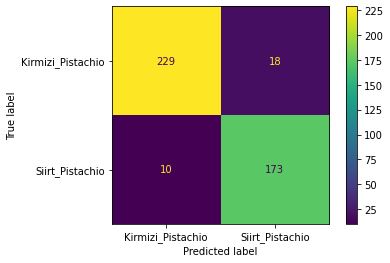

In [ ]:
# SVC
# Use the validation set to optimize the hyperparameters you wish to
c_options = [0.1, 1.0, 10.0]
best_c = 0.1
best_c_perf = 0
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids];

for c in c_options:
  print("\n for c="+str(c)+"...")
  model = SVC(C=c, kernel='rbf', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
  model.fit(scaled_feats_28[train_set_ids, :], train_labels)
  val_pred = model.predict(scaled_feats_28[val_set_ids, :])

  avg_f1_score = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score > best_c_perf:
    best_c = c
    best_c_perf = avg_f1_score

print('\n The optimal c for this data is: '+str(best_c))

# Use the optimized hyperparameter to train the final model
model = SVC(C=best_c, kernel='rbf', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
model.fit(scaled_feats_28[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = labels[test_set_ids]
test_pred = model.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()


 for n_estimators=10...

 for n_estimators=20...

 for n_estimators=50...

 for n_estimators=100...

 for n_estimators=200...

 for n_estimators=500...

 The optimal n_estimators for this data is: 50

 The F1 scores for each of the classes are: [0.8677686  0.82978723]

 The average F1 score is: 0.8487779145419377

 The overall accuracy is: 0.8511627906976744


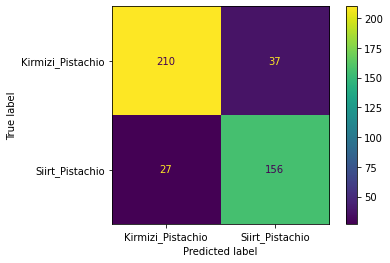

In [ ]:
# random forest
# Use the validation set to optimize the hyperparameters you wish to
n_estimator = [10, 20, 50, 100, 200, 500]
best_n = 10
best_n_perf = 0
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids];

for n in n_estimator:
  print("\n for n_estimators="+str(n)+"...")
  rfc_model = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth = 2, verbose=0, class_weight='balanced', random_state=random_seed)
  rfc_model.fit(scaled_feats_28[train_set_ids, :], train_labels)
  val_pred = rfc_model.predict(scaled_feats_28[val_set_ids, :])

  avg_f1_score = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score > best_n_perf:
    best_n = n
    best_n_perf = avg_f1_score

print('\n The optimal n_estimators for this data is: '+str(best_n))

# Use the optimized hyperparameter to train the final model
rfc_model = RandomForestClassifier(n_estimators=best_n, criterion='gini', max_depth = 2, verbose=0, class_weight='balanced', random_state=random_seed)
rfc_model.fit(scaled_feats_28[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = labels[test_set_ids]
test_pred = rfc_model.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2



 for n_criterion=gini...

 for n_criterion=entropy...

 The optimal criterion for this data is: gini

 The F1 scores for each of the classes are: [0.84044944 0.82891566]

 The average F1 score is: 0.8346825504264248

 The overall accuracy is: 0.8348837209302326


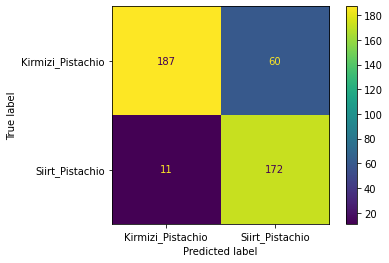

In [ ]:
# Use the validation set to optimize the hyperparameters you wish to
n_criterion = ['gini', 'entropy']
best_c = 'gini'
best_c_perf = 0
val_labels = labels[val_set_ids]
train_labels = labels[train_set_ids];

for c in n_criterion:
  print("\n for n_criterion="+str(c)+"...")
  dtc_model = DecisionTreeClassifier(criterion=c, max_depth = 2, min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=random_seed)
  dtc_model.fit(scaled_feats_28[train_set_ids, :], train_labels)
  val_pred = dtc_model.predict(scaled_feats_28[val_set_ids, :])

  avg_f1_score = f1_score(val_labels, val_pred, average='macro')

  if avg_f1_score > best_c_perf:
    best_c = c
    best_c_perf = avg_f1_score

print('\n The optimal criterion for this data is: '+str(best_c))

# Use the optimized hyperparameter to train the final model
dtc_model = DecisionTreeClassifier(criterion= best_c, max_depth = 2, min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=random_seed)
dtc_model.fit(scaled_feats_28[train_set_ids, :], train_labels)

# Evaluate the trained model using the test set
test_labels = labels[test_set_ids]
test_pred = dtc_model.predict(scaled_feats_28[test_set_ids, :])

avg_f1_score = f1_score(test_labels, test_pred, average='macro')
f1_scores = f1_score(test_labels, test_pred, average=None)
print('\n The F1 scores for each of the classes are: '+str(f1_scores))
print('\n The average F1 score is: '+str(avg_f1_score))


acc = accuracy_score(test_labels, test_pred)
print('\n The overall accuracy is: '+str(acc))

cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=label_types)
disp.plot()
plt.show()

# Results 

## Model Comparison Table

| Models | Accuracy | F1 Score |
| --- | --- | --- |
| Logistic Regression | 0.9093 | 0.9079 |
| K-Nearest Neighbors | 0.90 | 0.8978|
| GaussianNB | 0.90 | 0.8978|
| SVC | 0.9349 | 0.9337 |
| Random Forest CLassifier | 0.8512 | 0.8488 |
| Decision Tree Classifier | 0.8349 | 0.8347 |
| Three layer MLP | 0.86 | 0.85 |
| Three layer MLP for Images | 0.92 | 0.92 |
